##Premier League data analytics


In this notebook I will analyze the dataframe `matches.csv`. This dataset compiles information on the past two seasons of **the Premier League from 2020 - 2022**.  Some of the columns in this table are the result of each match, date of matches (calendar date and day of the week), captains, team names, information about where the match took place. It is these columns that I will use for my analysis. 

`The main purpose of this analysis is to figure out what conditions are favorable to win the team, based on two years. `

Elements of Analysis:

1.   Import libraries
1.   Exploratory Analysis (short analytics of whole dataset)
2.   Data Cleaning (Removing unnecessary columns, filling empty spaces (if necessary))
2.    Analytics 

Includes questions about:
*   match time
*   match place
*   captains








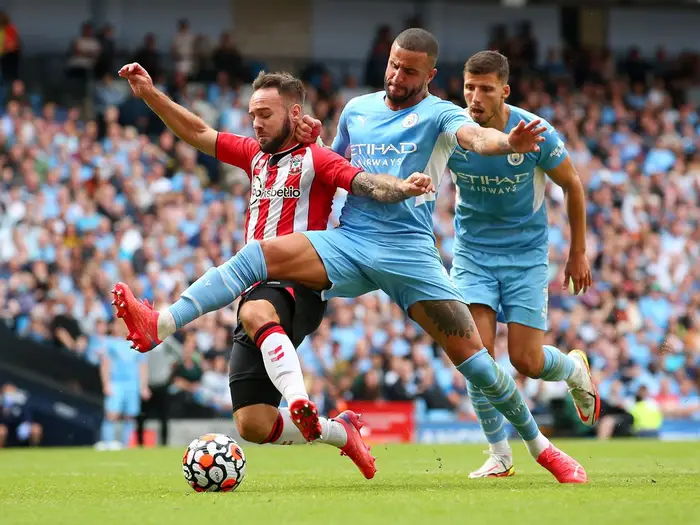

#Import libraries and reading the file

In [52]:
# Import libraries 

# data analysis 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# data visualization 
import matplotlib.pyplot as plt  
import seaborn as sns
import missingno as msno

# Reading the CSV-file data

matches = pd.read_csv("https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/football_matches/matches.csv", index_col=0)
matches.shape

(1389, 27)

#Exploratory Analysis

In [53]:
#How many columns, how many rows and memory usage

matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      

In [54]:
#Look at edge cases

matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,52698.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [55]:
matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,2.0,34.0,NaN,John Egan,3-4-1-2,Andre Marriner,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,2.1,50.0,NaN,John Egan,3-5-2,Simon Hooper,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,1.3,38.0,NaN,John Egan,3-4-3,Jonathan Moss,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,1.5,50.0,10000.0,John Egan,3-4-3,Robert Jones,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United
42,2021-05-23,16:00,Premier League,Matchweek 38,Sun,Home,W,1.0,0.0,Burnley,0.6,1.0,41.0,5000.0,John Egan,3-4-3,Kevin Friend,Match Report,NaN,12.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United


In [56]:
print(f'Duplicates in data set: {matches.duplicated().sum()}, ({np.round(100*matches.duplicated().sum()/len(matches),1)}%)')
print(f'Number of distinct elements: {matches.nunique()}')

Duplicates in data set: 0, (0.0%)
Number of distinct elements: date            244
time             18
comp              1
round            38
day               7
venue             2
result            3
gf                9
ga                9
opponent         23
xg               44
xga              45
poss             64
attendance      334
captain          91
formation        16
referee          23
match report      1
notes             0
sh               32
sot              16
dist            160
fk                5
pk                4
pkatt             4
season            2
team             23
dtype: int64


In [57]:
#Gen an overview of missing values

matches.isna().sum(axis = 0) / len(matches) * 100

date              0.000000
time              0.000000
comp              0.000000
round             0.000000
day               0.000000
venue             0.000000
result            0.000000
gf                0.000000
ga                0.000000
opponent          0.000000
xg                0.000000
xga               0.000000
poss              0.000000
attendance       50.107991
captain           0.000000
formation         0.000000
referee           0.000000
match report      0.000000
notes           100.000000
sh                0.000000
sot               0.000000
dist              0.071994
fk                0.000000
pk                0.000000
pkatt             0.000000
season            0.000000
team              0.000000
dtype: float64

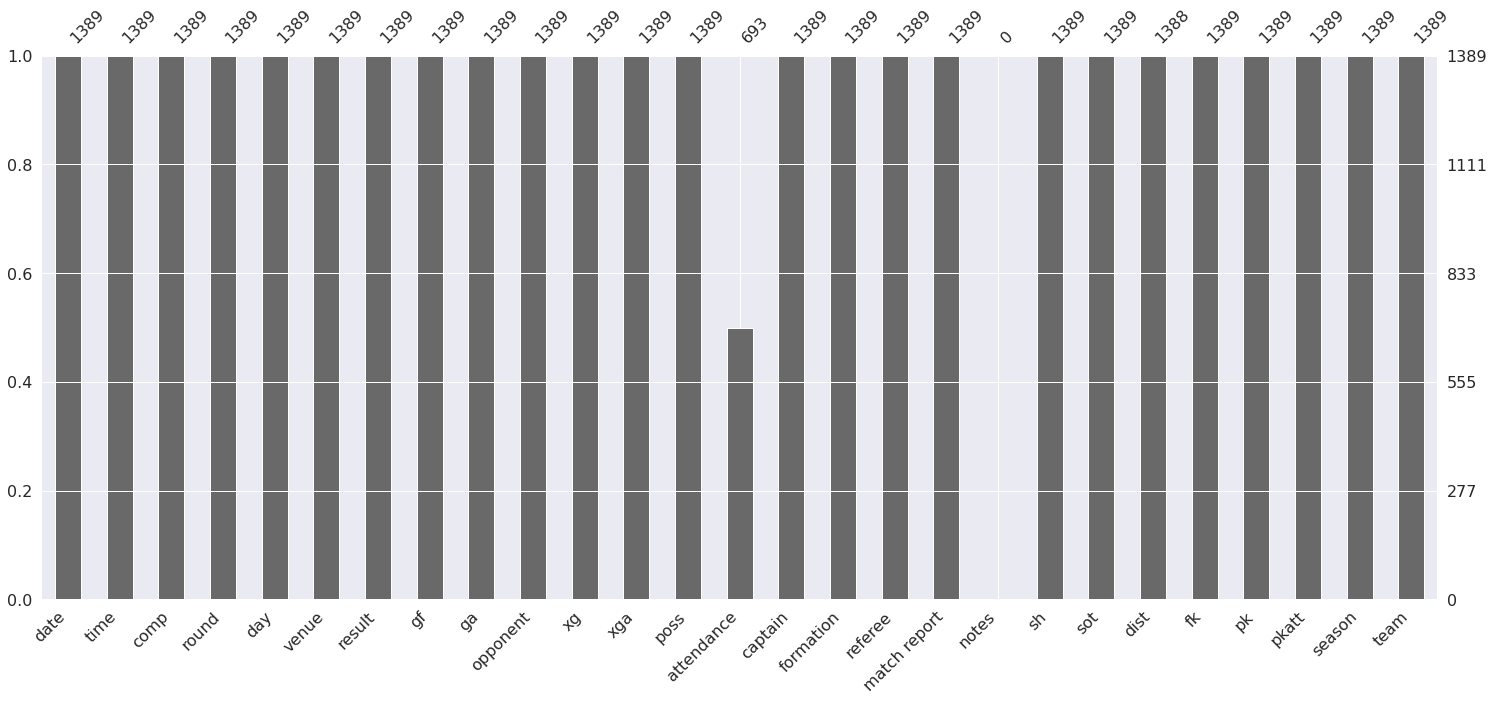

In [58]:
#Visualization of missing values

msno.bar(matches)

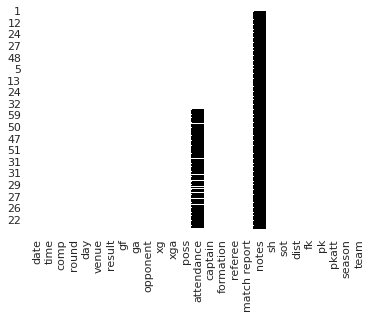

In [59]:
#Another overview of missing values

sns.heatmap(matches.isna(),
            cbar = False, 
            cmap = "binary")

From this analysis it is clear that the dataset is usable, there are no duplicates, but nevertheless it is necessary to get rid of unnecessary columns

#Data cleaning

In [166]:
#Convert object date type of 'date' to datetime data type

matches["date"] = pd.to_datetime(matches["date"], format = '%Y-%m-%d' )

In [ ]:
matches['month'] = pd.DatetimeIndex(matches['date']).month

In [203]:
# Drop unnessary columns
matches_updated = matches.drop(matches.columns[2:3], axis=1)
print(matches_updated.columns)

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'month'],
      dtype='object')


In [206]:
matches_updated1 = matches_updated.drop(matches_updated.columns[7:13], axis=1)
print(matches_updated1.columns)

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'month'],
      dtype='object')


In [207]:
matches_updated2 = matches_updated1.drop(matches.columns[15:26], axis=1)
print(matches_updated2.columns)

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'captain',
       'team', 'month'],
      dtype='object')


In this section I removed unnecessary columns. There was no need to rename columns for convenience, there are no duplicates. Columns with NaN value are not used and were simply deleted

#Analytics with Visualization

In this part I begin the basic work with the dataset. It will consist of 5 questions that will help us figure out at what time, where, and with which captain a Premier League team is most likely to win

##Home or away?

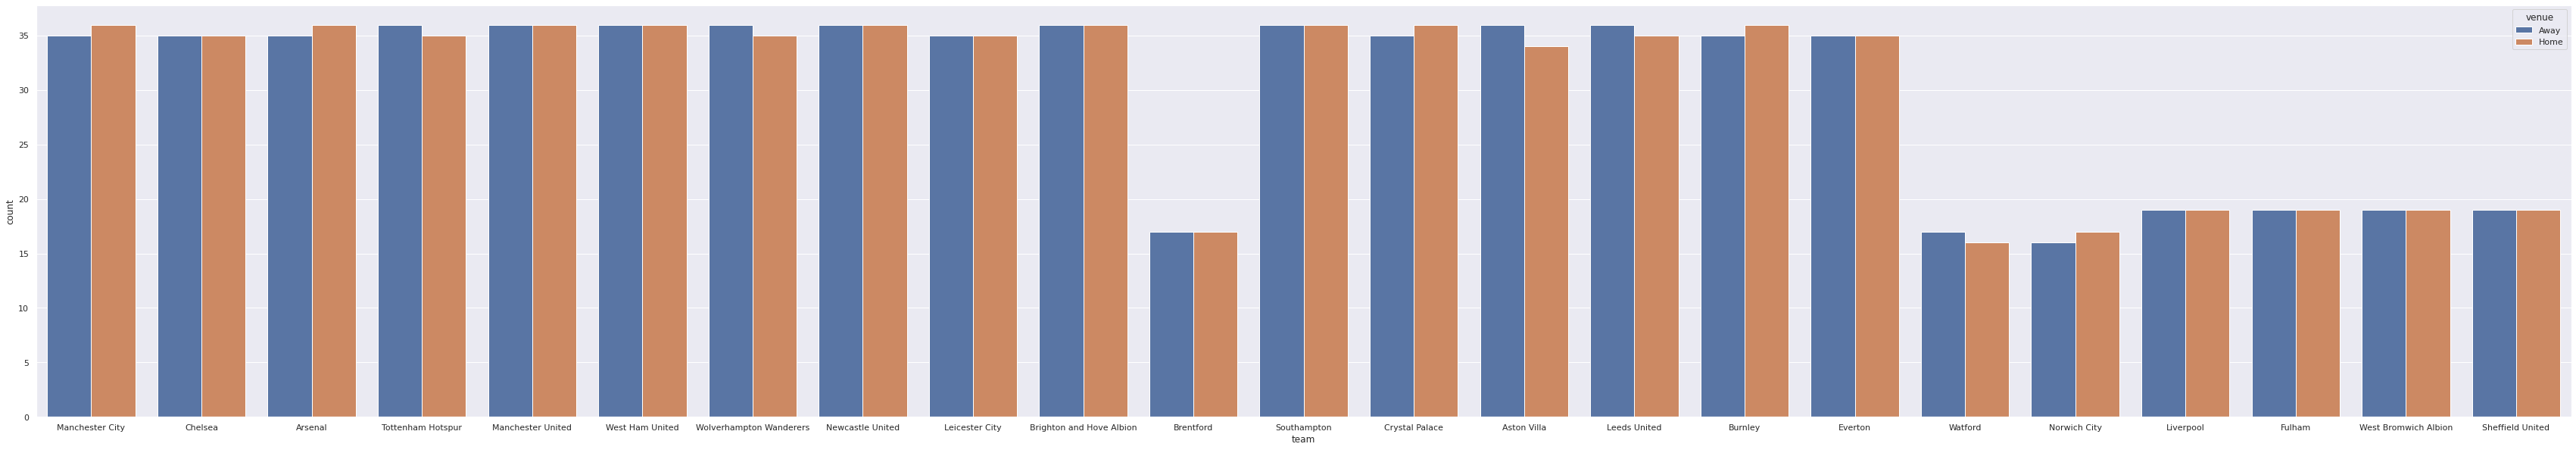

In [208]:
#Let's see where and how many matches the teams played

plt.figure(figsize=(60,10))
sns.countplot(data=matches_updated2, x='team', hue='venue')

In [210]:
#Let's make a dataset, where the result of the game is only victory

data1 = matches_updated2.loc[matches_updated2.result == 'W'].copy()

In [212]:
data1['venue'].value_counts()

Home    272
Away    254
Name: venue, dtype: int64

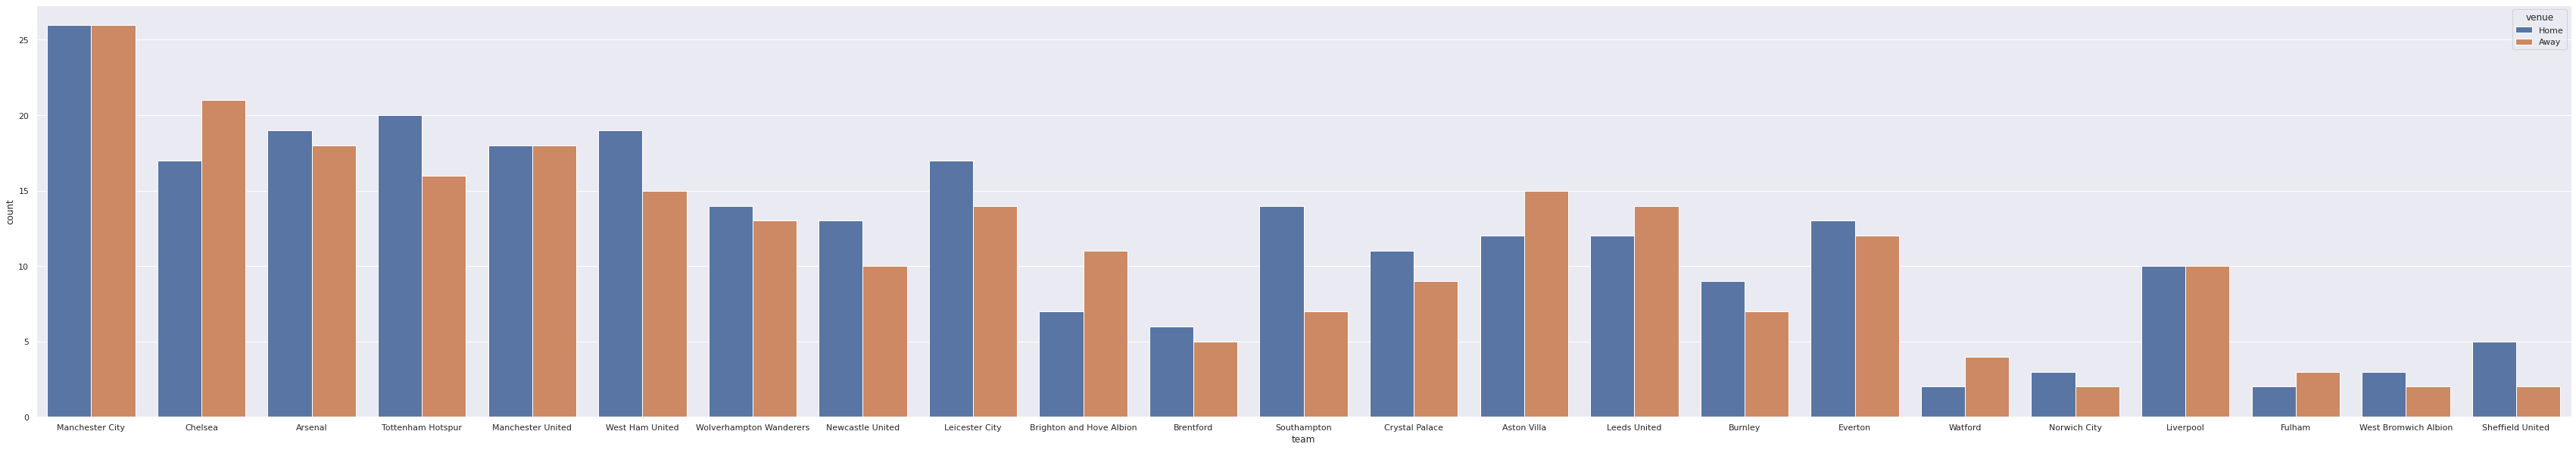

In [211]:
#Creating count plot for easy understanding where teams win

plt.figure(figsize=(60,10))
sns.countplot(data=data1, x='team', hue='venue')

Basically there is no difference where the team plays, it is also worth noting that there are more matches played at home than those played on foreign soil. Nevertheless, looking at the histogram you can see that there are slightly more wins at home. 

##2. Good time for win at home

In [213]:
#Let's make a dataset, where the match location is at Home

data2 = matches_updated2.loc[matches_updated2.venue == 'Home'].copy()

In [214]:
#We don't have a certain part of the day, just hours and minutes. To make it easier to understand, I will divide all this time into two groups: day and evening

data2["time"].value_counts()

15:00    141
20:00    106
14:00     74
17:30     63
12:30     57
16:30     51
18:00     44
20:15     39
12:00     25
19:30     21
19:15     19
19:45     18
16:00     11
19:00     10
14:15      8
14:05      5
13:30      1
17:45      1
Name: time, dtype: int64

In [215]:
data2 = data2.replace({'time':{'12:00':'day', '12:30':'day', '13:30':'day', '14:00':'day', '14:05':'day', '14:15':'day', '15:00':'day', '16:00':'evening', '16:30':'evening', '17:30':'evening', '17:45':'evening', '18:00':'evening', '19:00':'evening', '19:15':'evening', '19:30':'evening', '19:45':'evening', '20:00':'evening', '20:15':'evening'}})


In [216]:
data2["time"].value_counts()

evening    383
day        311
Name: time, dtype: int64

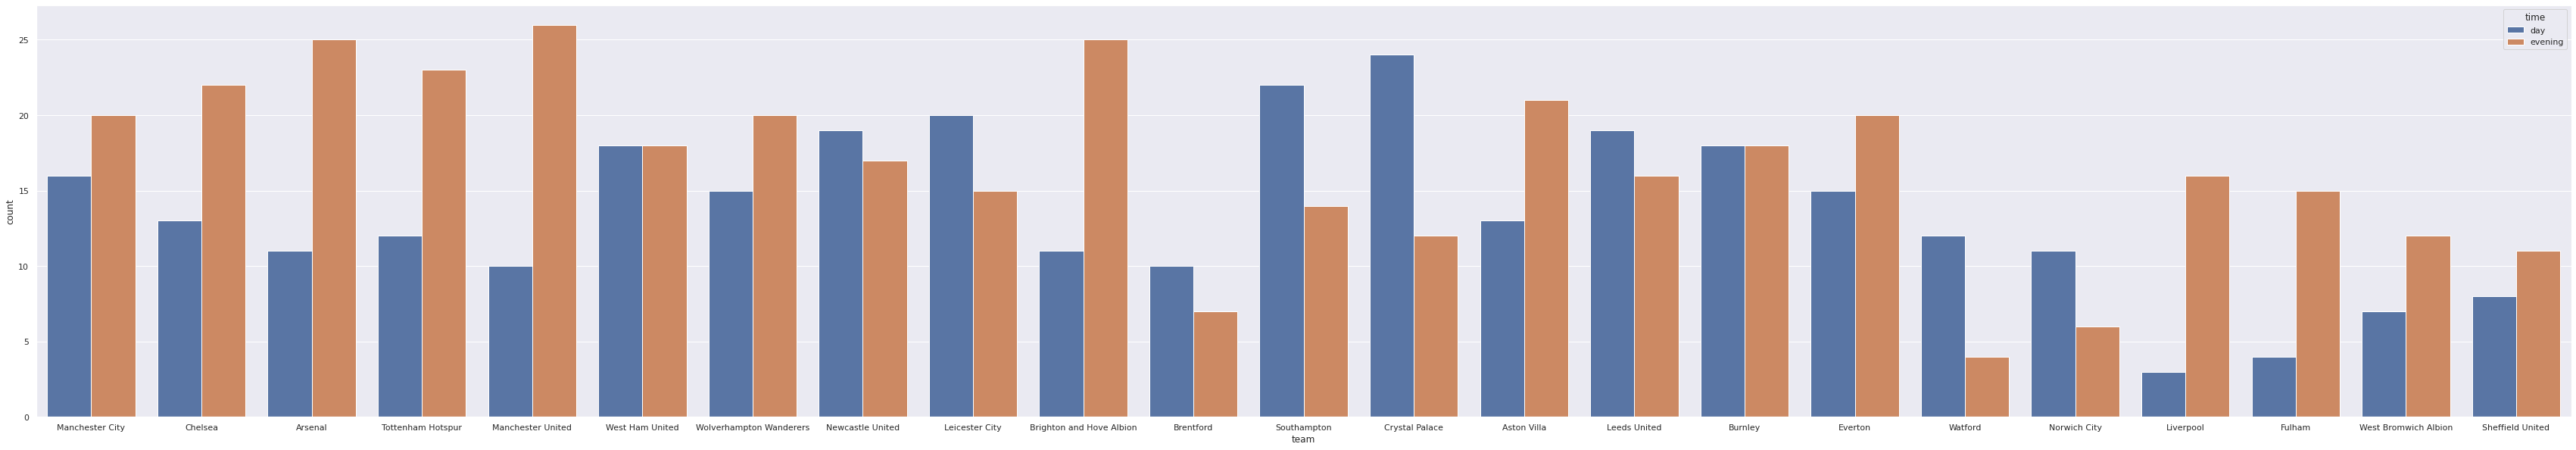

In [67]:
#Creating histogram for the answer

plt.figure(figsize=(60,10))
sns.countplot(data=data2, x='team', hue='time')

We have the same situation as before. There were more matches in the evening and this must be taken into account in analyzing the histogram. We see an interesting picture. For the teams that are winning more and have played few matches so far, the best time is in the evening. For teams that play an average game it is daytime. 

##3. Day of the week

In [219]:
# Most of the matches take place on weekends and we have to keep that in mind when analyzing

data2["day"].value_counts()

Sat    273
Sun    211
Wed     63
Mon     52
Tue     44
Fri     27
Thu     24
Name: day, dtype: int64

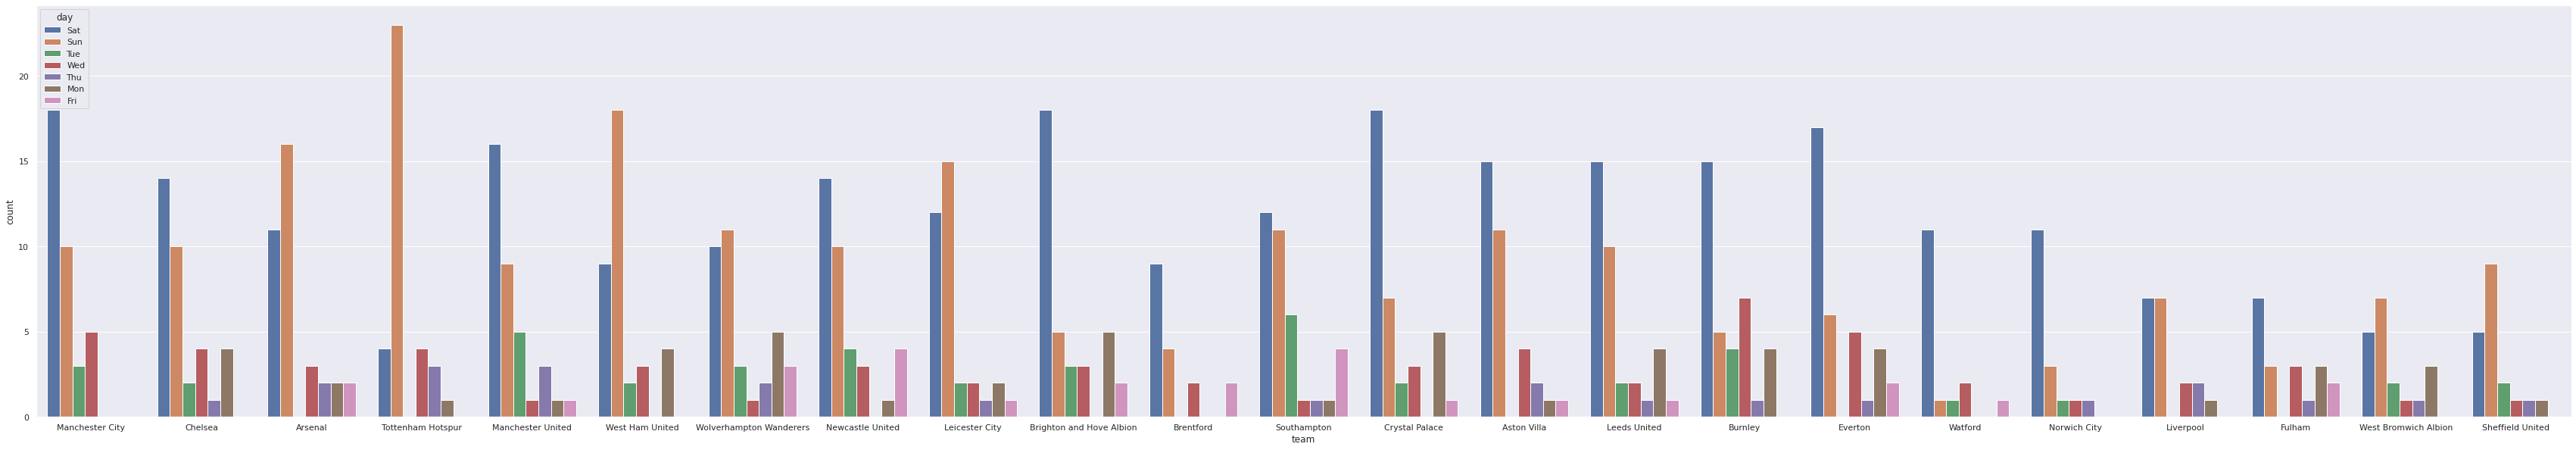

In [220]:
# Let's look at the situation in general

plt.figure(figsize=(60,10))
sns.countplot(data=data2, x='team', hue='day')

In [221]:
datateam = data2.loc[data2.day.isin(['Sat', 'Sun']) & (data2.result == 'W')]

In [222]:
datateam["team"].value_counts()

Manchester City             19
Tottenham Hotspur           17
Arsenal                     15
Leicester City              13
Chelsea                     13
Manchester United           12
West Ham United             12
Aston Villa                 11
Newcastle United             9
Crystal Palace               9
Liverpool                    8
Everton                      8
Leeds United                 8
Southampton                  8
Wolverhampton Wanderers      8
Brighton and Hove Albion     6
Brentford                    4
Norwich City                 3
Burnley                      2
Watford                      2
West Bromwich Albion         2
Sheffield United             2
Fulham                       1
Name: team, dtype: int64

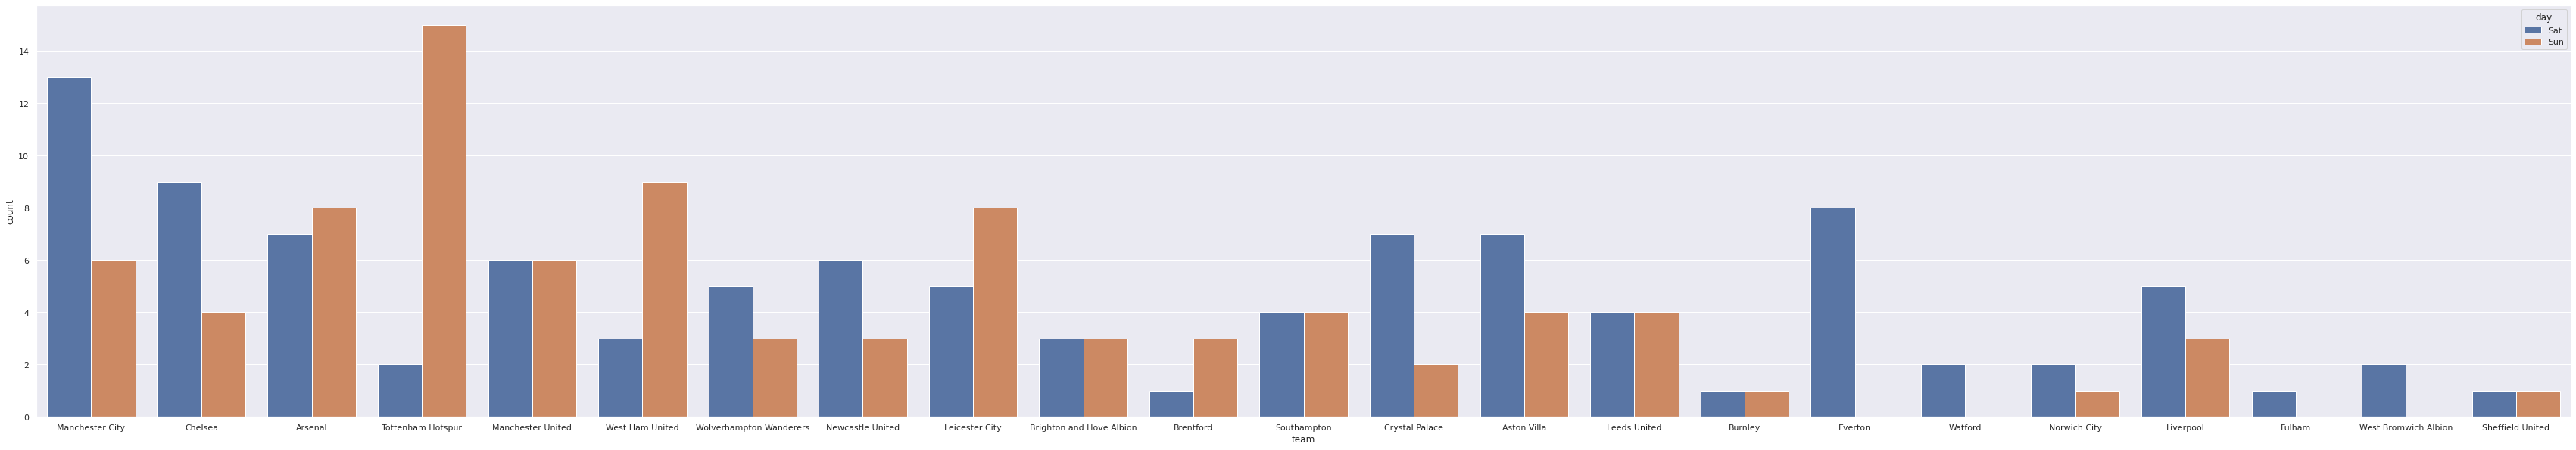

In [223]:
# Let's build a histogram just for the weekends, which will help us see the picture more clearly and fairly

plt.figure(figsize=(60,10))
sns.countplot(data=datateam, x='team', hue='day')

Analyzing the resulting histogram I can not say exactly which day is better to play. For teams that have not yet finished all of their scheduled matches, the trend is toward Saturday, and for those that are already more or less successful Sunday.

##4. What month

In [226]:
#Let's look at the months in which the teams won (we only highlighted wins from the result column)

data1["month"].value_counts()

12    212
2     184
4     160
1     159
10    142
11    133
3     127
9     113
5     102
8      57
Name: month, dtype: int64

In [227]:
data1.head()

,date,time,round,day,venue,result,gf,captain,team,month
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,İlkay Gündoğan,Manchester City,8
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,İlkay Gündoğan,Manchester City,8
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,İlkay Gündoğan,Manchester City,9
8,2021-09-25,12:30,Matchweek 6,Sat,Away,W,1.0,Rúben Dias,Manchester City,9
11,2021-10-16,15:00,Matchweek 8,Sat,Home,W,2.0,Kevin De Bruyne,Manchester City,10


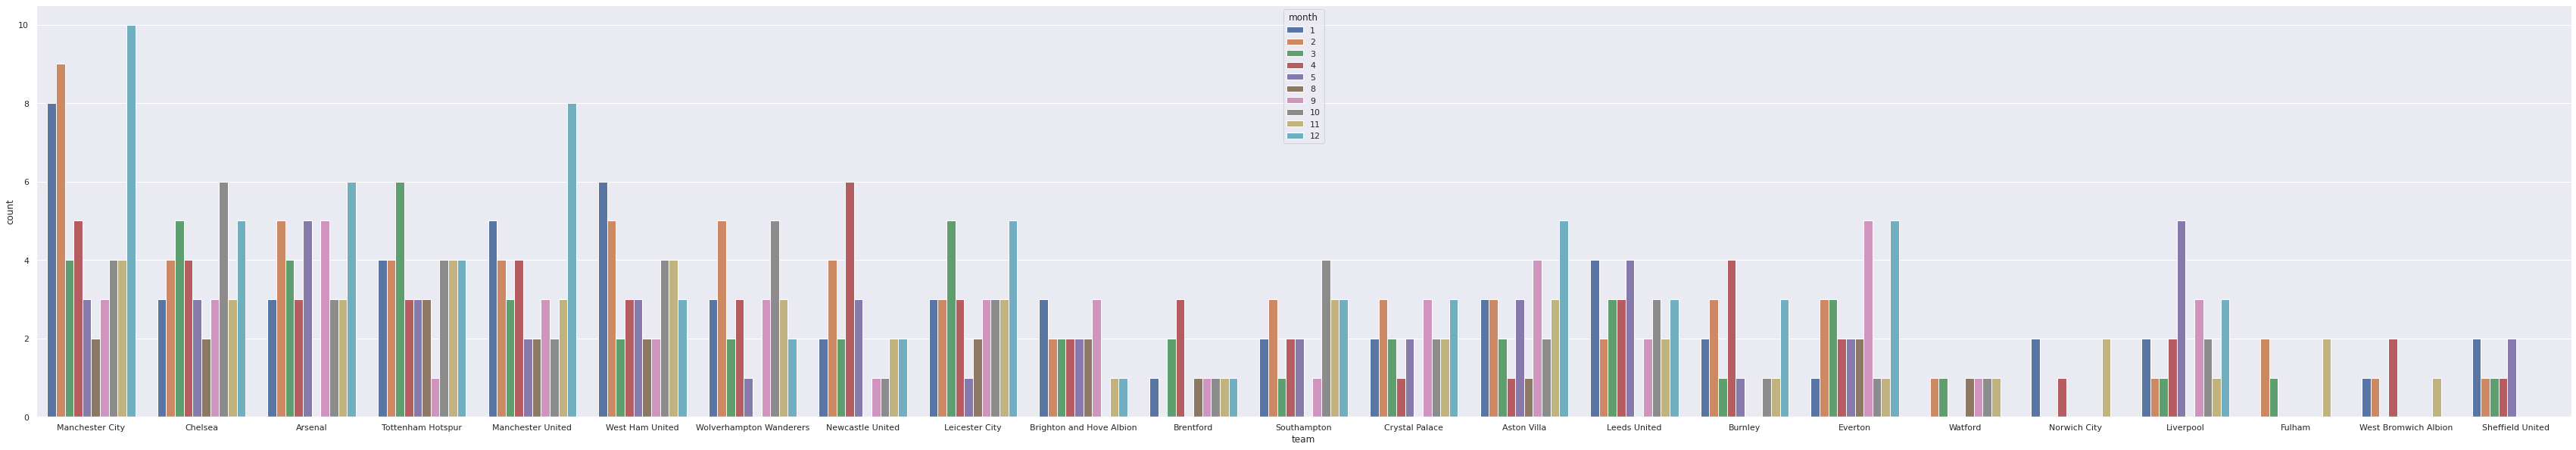

In [228]:
plt.figure(figsize=(60,10))
sns.countplot(data=data1, x='team', hue='month')

Consider the months in which the teams won (we only highlighted wins from the result column). Most wins in winter (January, December) and at the beginning of the season (September)

##5. Exploring the captain's influence on the team



In [229]:
#Let's highlight only the columns we need

data5 = data1[['team', 'result', 'captain']]

In [164]:
#Let's choose the 2 largest teams just to consider the situation

data5а = data5.loc[data5.team.isin(['Manchester City', 'Arsenal'])]

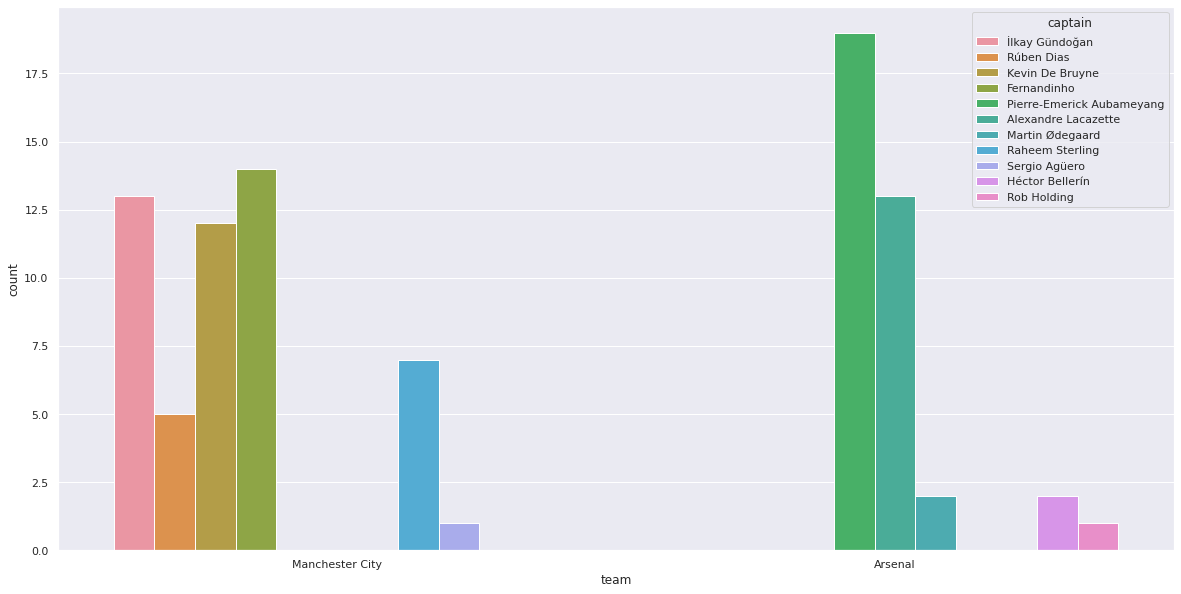

In [165]:
#Drawing a histogram

plt.figure(figsize=(20,10))
sns.countplot(data=data5a, x='team', hue='captain')

It's hard to draw a specific conclusion about the captains. As I see it, the best option is to conduct a separate additional analysis of the captains and their experience

What can help make sense of this particular issue: 

[Ranking the Captains of All 20 EPL Clubs](https://bleacherreport.com/articles/955203-english-premier-league-ranking-the-captains-of-all-20-epl-clubs)

[How to be a good captain](https://thechamplair.com/soccer/how-to-become-a-good-soccer-captain/)

#Summary

Ideal conditions for teams with more wins and more games played would be: 

-Winter months, evening time at their stadium mostly Sunday

Ideal conditions for teams that have played less than half their matches and are not notable for success would be: 

-Winter months, early season or winter, evening hours and mostly Saturday

Captains are best chosen who have been in the team longer (deserves more analysis)